In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import math
file_path_per_cycle = '/home/mremington/Documents/uumarrty_exps/owl_exp/exp2/Data/per_cycle.csv'
file_path_totals = '/home/mremington/Documents/uumarrty_exps/owl_exp/exp2/Data/totals.csv'
file_path_parameter = '/home/mremington/Documents/uumarrty_exps/owl_exp/exp2/Data/parameters.csv'
per_cycle = pd.read_csv(file_path_per_cycle,header = 0, index_col=None)
parameters = pd.read_csv(file_path_parameter,header = 0, index_col=None)
totals = pd.read_csv(file_path_totals,header = 0, index_col=None)
sim = per_cycle[per_cycle['sim_number']==0]
#sim = sim[sim['experiment']=='experiment1']
sim_krat = sim[sim['org']=='krat']
sim_snake = sim[sim['org']=='snake']
krat_reproduction_freq = parameters['krat_reproduction_freq_per_x_cycles'].max()
snake_reproduction_freq = parameters['snake_reproduction_freq_per_x_cycles'].max()
krat_by_gen = sim_krat[sim_krat.apply(lambda sim_krat: (sim_krat['cycle'] % krat_reproduction_freq)==0, axis=1)]
snake_by_gen = sim_snake[sim_snake.apply(lambda sim_snake: (sim_snake['cycle'] % snake_reproduction_freq)==0, axis=1)]

In [2]:
per_cycle.head()

,file_name,experiment,sim_number,org,sim_id,generation,cycle,pop_count,bush_pw_mean,bush_pw_std,...,energy_score_sum,movements_mean,movements_std,movements_sum,other_in_cell_mean,other_in_cell_std,other_in_cell_sum,owls_in_cell_mean,owls_in_cell_std,owls_in_cell_sum
0,experiment_2_sim_0_krat_info.csv,experiment2,0,krat,208a4ea59a2946d58c922d01db1dd219,3999,200000,467,1.000000,0.000000,...,114415,48.817987,0.433394,22798,0.000000,0.000000,0,0.0,0.0,0
1,experiment_2_sim_0_krat_info.csv,experiment2,0,krat,208a4ea59a2946d58c922d01db1dd219,4000,200050,464,1.000000,0.000000,...,113680,48.846983,0.377944,22665,0.000000,0.000000,0,0.0,0.0,0
2,experiment_2_sim_0_krat_info.csv,experiment2,0,krat,208a4ea59a2946d58c922d01db1dd219,4001,200100,461,0.995662,0.065795,...,112945,48.811280,0.438826,22502,0.000000,0.000000,0,0.0,0.0,0
3,experiment_2_sim_0_krat_info.csv,experiment2,0,krat,208a4ea59a2946d58c922d01db1dd219,4002,200150,441,1.000000,0.000000,...,108045,48.832200,0.425288,21535,0.002268,0.047619,1,0.0,0.0,0
4,experiment_2_sim_0_krat_info.csv,experiment2,0,krat,208a4ea59a2946d58c922d01db1dd219,4003,200200,448,1.000000,0.000000,...,109760,48.828125,0.422429,21875,0.000000,0.000000,0,0.0,0.0,0


In [21]:
result = pd.merge(krat_by_gen,
                  totals[['sim_id','data_type','mean_bush_pref']],
                  how="left",
                  left_on=['sim_id','org'],
                  right_on=["sim_id", "data_type"])

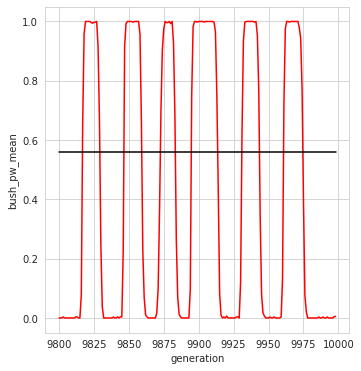

In [23]:
krat_gen_temp = result[result['generation']>=9800]

f = plt.figure(figsize=(12, 6))
gs = f.add_gridspec(1, 2)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(data=krat_gen_temp, x='generation', y='bush_pw_mean',color='r')
    sns.lineplot(data=krat_gen_temp, x='generation', y="mean_bush_pref", color='k')